<a href="https://colab.research.google.com/github/ritaprova/Machile-learning-/blob/main/kaggle_submission_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#importing the train and test sets 
df_train = pd.read_csv("/content/drive/MyDrive/train.csv")
df_test =  pd.read_csv("/content/drive/MyDrive/test.csv")

In [ ]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
#getting rid of the ID attribute as we wont be needing this 
df_train_temp = df_train.drop("Id",axis=1)
df_test_temp =  df_test.drop("Id",axis=1)

#Handling Missing Values

In [ ]:
df_train_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

we will drop those columns with less than 146 data entries 

In [ ]:
# for the train data-set 
df_train_temp.drop(["Alley","PoolQC","MiscFeature"], axis=1,inplace=True)

In [ ]:
#for the test data set 
df_test_temp.drop(["Alley","PoolQC","MiscFeature"],axis=1,inplace=True)

In [ ]:
df_train_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

We have dropped the colums with less than 10% of the len of the data  for the train as well as the test sets 

In [ ]:
# filling the numerical data types 
for label , content in df_train_temp.items():
  if (pd.api.types.is_numeric_dtype(content) & (df_train_temp[label].isna().sum()>0)):
    print(label)

LotFrontage
MasVnrArea
GarageYrBlt


In [ ]:
df_train_temp["LotFrontage"].isna().sum()

259

(array([  0., 100., 200., 300., 400., 500., 600., 700.]),
 <a list of 8 Text major ticklabel objects>)

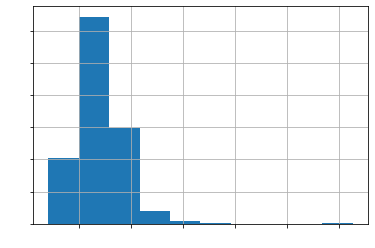

In [ ]:
df_train_temp["LotFrontage"].hist()
plt.xticks(color='white')
plt.yticks(color='white')

In [ ]:
#finding out the mode of the distribution 
mode = df_train_temp["LotFrontage"].mode()[0]
df_train_temp["LotFrontage"].fillna(mode,inplace=True)

(array([   0.,  200.,  400.,  600.,  800., 1000., 1200.]),
 <a list of 7 Text major ticklabel objects>)

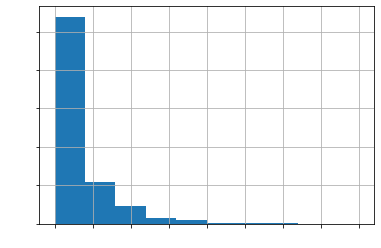

In [ ]:
df_train_temp["MasVnrArea"].hist()
plt.xticks(color ="white")
plt.yticks(color="white")


In [ ]:
# function for imputing the missing numerical data 
# we have used the modes for imputing the missing numerical data 
features = ["LotFrontage","MasVnrArea","GarageYrBlt"]
for label in features:
   df_train_temp[label].fillna(df_train_temp[label].mode()[0],inplace=True)


In [ ]:
# checking for missing numerical features :
# filling the numerical data types 
for label , content in df_train_temp.items():
  if (pd.api.types.is_numeric_dtype(content) & (df_train_temp[label].isna().sum()>0)):
    print(label)

thus we see that we have successfully gottem rid of all the missing numerical data

#for the test data set :
#checking for missing numerical columns :
for label , content in df_test_temp.items():
  if (pd.api.types.is_numeric_dtype(content) & (df_test_temp[label].isna().sum()>0)):
    print(label)

In [ ]:
missing_numerical_features = ["LotFrontage","MasVnrArea","BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","TotalBsmtSF","BsmtFullBath","BsmtHalfBath","GarageYrBlt","GarageCars","GarageArea"]
for label in missing_numerical_features:
  print(df_test_temp[label].isna().sum())

227
15
1
1
1
1
2
2
78
1
1


(array([  0., 100., 200., 300., 400., 500., 600.]),
 <a list of 7 Text major ticklabel objects>)

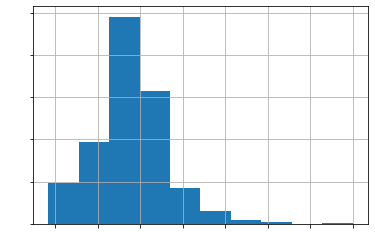

In [ ]:
df_test_temp["LotFrontage"].hist()
plt.xticks(color='white')
plt.yticks(color='white')

In [ ]:
# function for imputing the missing numerical data 
# we have used the modes for imputing the missing numerical data 
features = ["LotFrontage","MasVnrArea","BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","TotalBsmtSF","BsmtFullBath","BsmtHalfBath","GarageYrBlt","GarageCars","GarageArea"]
for label in features:
   df_test_temp[label].fillna(df_test_temp[label].mode()[0],inplace=True)


In [ ]:
#for the test data set :
#checking for missing numerical columns :
for label , content in df_test_temp.items():
  if (pd.api.types.is_numeric_dtype(content) & (df_test_temp[label].isna().sum()>0)):
    print(label)

Thus the numerical features of both the train and test data sets have been taken care of 

#for the string objects 

In [ ]:
# checking for string data-objects in the train data 
for  label , content in df_train_temp.items():
   if (pd.api.types.is_string_dtype(content) & (df_train_temp[label].isna().sum()>0)) :
     print(label)

MasVnrType
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Electrical
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
Fence


In [ ]:
missing_string_features = ["MasVnrType","BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2","Electrical","FireplaceQu","GarageType","GarageFinish","GarageQual","GarageCond","Fence"]
for label in missing_string_features:
  df_train_temp[label].fillna(df_train_temp[label].mode()[0],inplace=True)

In [ ]:
# checking for string data-objects in the train data 
for  label , content in df_train_temp.items():
   if (pd.api.types.is_string_dtype(content) & (df_train_temp[label].isna().sum()>0)) :
     print(label)

thus the missing string objects of the train set has been handelled 

In [ ]:
#checking for the test data :
# checking for string data-objects in the train data 
for  label , content in df_test_temp.items():
   if (pd.api.types.is_string_dtype(content) & (df_test_temp[label].isna().sum()>0)) :
     df_test_temp[label].fillna(df_test_temp[label].mode()[0],inplace=True)

In [ ]:
df_test_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1459 non-null   object 
 2   LotFrontage    1459 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   LotShape       1459 non-null   object 
 6   LandContour    1459 non-null   object 
 7   Utilities      1459 non-null   object 
 8   LotConfig      1459 non-null   object 
 9   LandSlope      1459 non-null   object 
 10  Neighborhood   1459 non-null   object 
 11  Condition1     1459 non-null   object 
 12  Condition2     1459 non-null   object 
 13  BldgType       1459 non-null   object 
 14  HouseStyle     1459 non-null   object 
 15  OverallQual    1459 non-null   int64  
 16  OverallCond    1459 non-null   int64  
 17  YearBuilt      1459 non-null   int64  
 18  YearRemo

In [ ]:
df_train_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [ ]:
# changing the sting objects to category objects in the train dat set 
for label , content in df_train_temp.items():
  if pd.api.types.is_string_dtype(content):
    df_train_temp[label] = df_train_temp[label].astype('category')

In [ ]:
df_train_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   MSSubClass     1460 non-null   int64   
 1   MSZoning       1460 non-null   category
 2   LotFrontage    1460 non-null   float64 
 3   LotArea        1460 non-null   int64   
 4   Street         1460 non-null   category
 5   LotShape       1460 non-null   category
 6   LandContour    1460 non-null   category
 7   Utilities      1460 non-null   category
 8   LotConfig      1460 non-null   category
 9   LandSlope      1460 non-null   category
 10  Neighborhood   1460 non-null   category
 11  Condition1     1460 non-null   category
 12  Condition2     1460 non-null   category
 13  BldgType       1460 non-null   category
 14  HouseStyle     1460 non-null   category
 15  OverallQual    1460 non-null   int64   
 16  OverallCond    1460 non-null   int64   
 17  YearBuilt      1460 non-null   in

In [ ]:
#changing the category into codes:

for label , content in df_train_temp.items():
  if pd.api.types.is_categorical_dtype(content):
    df_train_temp[label] = pd.Categorical(content).codes

In [ ]:
df_train_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   int8   
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   int8   
 5   LotShape       1460 non-null   int8   
 6   LandContour    1460 non-null   int8   
 7   Utilities      1460 non-null   int8   
 8   LotConfig      1460 non-null   int8   
 9   LandSlope      1460 non-null   int8   
 10  Neighborhood   1460 non-null   int8   
 11  Condition1     1460 non-null   int8   
 12  Condition2     1460 non-null   int8   
 13  BldgType       1460 non-null   int8   
 14  HouseStyle     1460 non-null   int8   
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [ ]:
df_train_temp["SaleCondition"].value_counts()

4    1198
5     125
0     101
3      20
2      12
1       4
Name: SaleCondition, dtype: int64

In [ ]:
#doing the same for the test data 
# changing the sting objects to category objects in the train dat set 
for label , content in df_test_temp.items():
  if pd.api.types.is_string_dtype(content):
    df_test_temp[label] = df_test_temp[label].astype('category')
#changing the category into codes:

for label , content in df_test_temp.items():
  if pd.api.types.is_categorical_dtype(content):
    df_test_temp[label] = pd.Categorical(content).codes

In [ ]:
df_test_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1459 non-null   int8   
 2   LotFrontage    1459 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   int8   
 5   LotShape       1459 non-null   int8   
 6   LandContour    1459 non-null   int8   
 7   Utilities      1459 non-null   int8   
 8   LotConfig      1459 non-null   int8   
 9   LandSlope      1459 non-null   int8   
 10  Neighborhood   1459 non-null   int8   
 11  Condition1     1459 non-null   int8   
 12  Condition2     1459 non-null   int8   
 13  BldgType       1459 non-null   int8   
 14  HouseStyle     1459 non-null   int8   
 15  OverallQual    1459 non-null   int64  
 16  OverallCond    1459 non-null   int64  
 17  YearBuilt      1459 non-null   int64  
 18  YearRemo

In [ ]:
df_test_temp["SaleCondition"]

0       4
1       4
2       4
3       4
4       4
       ..
1454    4
1455    0
1456    0
1457    4
1458    4
Name: SaleCondition, Length: 1459, dtype: int8

#Modelling 

let go with random forest regressor :


In [ ]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)
Rnd = RandomForestRegressor()
x_train = df_train_temp.drop("SalePrice",axis=1)
y_train = df_train_temp["SalePrice"]
x_test = df_test_temp
x_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,3,65.0,8450,1,3,3,0,4,0,5,2,2,0,5,7,5,2003,2003,1,1,12,13,1,196.0,2,4,2,2,3,3,2,706,5,0,150,856,1,0,1,4,856,854,0,1710,1,0,2,1,3,1,2,8,6,0,2,1,2003.0,1,2,548,4,4,2,0,61,0,0,0,0,2,0,2,2008,8,4
1,20,3,80.0,9600,1,3,3,0,2,0,24,1,2,0,2,6,8,1976,1976,1,1,8,8,2,0.0,3,4,1,2,3,1,0,978,5,0,284,1262,1,0,1,4,1262,0,0,1262,0,1,2,0,3,1,3,6,6,1,4,1,1976.0,1,2,460,4,4,2,298,0,0,0,0,0,2,0,5,2007,8,4
2,60,3,68.0,11250,1,0,3,0,4,0,5,2,2,0,5,7,5,2001,2002,1,1,12,13,1,162.0,2,4,2,2,3,2,2,486,5,0,434,920,1,0,1,4,920,866,0,1786,1,0,2,1,3,1,2,6,6,1,4,1,2001.0,1,2,608,4,4,2,0,42,0,0,0,0,2,0,9,2008,8,4
3,70,3,60.0,9550,1,0,3,0,0,0,6,2,2,0,5,7,5,1915,1970,1,1,13,15,2,0.0,3,4,0,3,1,3,0,216,5,0,540,756,1,2,1,4,961,756,0,1717,1,0,1,0,3,1,2,7,6,1,2,5,1998.0,2,3,642,4,4,2,0,35,272,0,0,0,2,0,2,2006,8,0
4,60,3,84.0,14260,1,0,3,0,2,0,15,2,2,0,5,8,5,2000,2000,1,1,12,13,1,350.0,2,4,2,2,3,0,2,655,5,0,490,1145,1,0,1,4,1145,1053,0,2198,1,0,2,1,4,1,2,9,6,1,4,1,2000.0,1,3,836,4,4,2,192,84,0,0,0,0,2,0,12,2008,8,4


In [ ]:
#fitting the model:
Rnd.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
y_preds = Rnd.predict(x_test)
y_preds[:30]


array([128779.33, 154398.  , 181596.96, 181978.4 , 194535.  , 183773.45,
       170660.02, 176706.3 , 183231.06, 120026.6 , 197841.72,  93961.  ,
        97275.  , 152217.  , 141869.3 , 374529.06, 249388.  , 307809.95,
       257006.51, 459152.6 , 303380.19, 206010.57, 174771.61, 178329.05,
       173085.77, 203571.75, 321000.29, 238088.39, 210621.65, 201855.41])

In [ ]:
y_preds_train = Rnd.predict(x_train)
y_preds_train

array([205846.51, 177252.5 , 220261.75, ..., 259441.79, 142204.3 ,
       149226.5 ])

In [ ]:
y_preds_train = pd.Series(y_preds_train)

In [ ]:
y_preds_train

0       205846.51
1       177252.50
2       220261.75
3       159567.78
4       268028.93
          ...    
1455    176514.00
1456    206993.00
1457    259441.79
1458    142204.30
1459    149226.50
Length: 1460, dtype: float64

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train, y_preds_train)

120953954.62549187

In [ ]:
y_train

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [ ]:
Rnd.score(x_train,y_preds_train)

1.0

In [ ]:
y_preds = pd.Series(y_preds)
len(y_preds)

1459

In [ ]:
df_test["Id"]

0       1461
1       1462
2       1463
3       1464
4       1465
        ... 
1454    2915
1455    2916
1456    2917
1457    2918
1458    2919
Name: Id, Length: 1459, dtype: int64

In [ ]:
submission = df_test
for labels in submission.columns:
  if not (labels=="Id"):
    submission = submission.drop(labels,axis=1)

In [ ]:
submission["SalePrice"] = y_preds

In [ ]:
submission.head()

,Id,SalePrice
0,1461,128779.33
1,1462,154398.00
2,1463,181596.96
3,1464,181978.40
4,1465,194535.00


In [ ]:
submission.to_excel("output.xlsx",index=False)

Hyperparameter tuning 


* max_depth
* min_sample_split
* max_leaf_nodes
* min_samples_leaf
* n_estimators
* max_sample (bootstrap sample)
* max_features